In [685]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_column',None)

In [686]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [687]:
df_train.shape

(891, 12)

In [688]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [689]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [690]:
df_test.shape

(418, 11)


**Missing Values**

In [691]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [692]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [693]:
df_train[df_train['Cabin'].isna()].shape[0] / df_train.shape[0]

0.7710437710437711

In [694]:
#Most of the cabin values are empty, ignore it.
df_train = df_train.drop(columns=['Cabin'])
df_test = df_test.drop(columns=['Cabin'])

<AxesSubplot:>

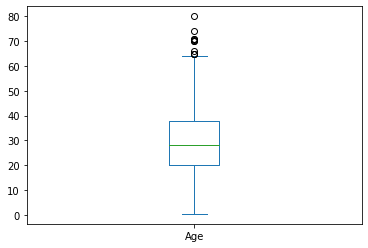

In [695]:
df_train['Age'].plot.box()

<AxesSubplot:>

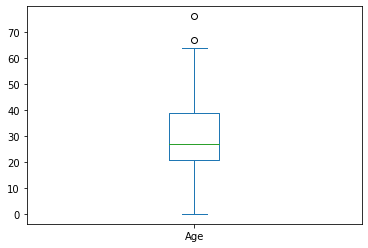

In [696]:
df_test['Age'].plot.box()

In [697]:
#Many outliers in age variable, using median to fillna
df_train['Age'].fillna(df_train['Age'].median(),inplace=True)
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)

<AxesSubplot:xlabel='count', ylabel='Embarked'>

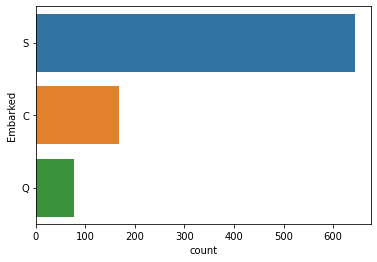

In [698]:
sns.countplot(y = df_train['Embarked'])

In [699]:
#Only two values are missing in embarked, replace them with the most common one
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0],inplace=True)

In [700]:
#Also one Fare is empty in test data
df_test['Fare'].fillna(df_test['Fare'].value_counts()[0],inplace=True)

In [701]:
# From data description: SibSp and Parch basicly means whether a person 
# has family-member in the ship so will combine them

df_train['FamilyMember'] = np.where((df_train["SibSp"]+df_train["Parch"])>0, 1, 0)
df_test['FamilyMember'] = np.where((df_test["SibSp"]+df_test["Parch"])>0, 1, 0)

df_train = df_train.drop(columns=['SibSp','Parch'])
df_test = df_test.drop(columns=['SibSp','Parch'])

PassengerId, Name and Ticket is not important, dropping them:

In [702]:
df_train = df_train.drop(columns=['PassengerId','Name','Ticket'])
df_test = df_test.drop(columns=['PassengerId','Name','Ticket'])

**Dummy variables for categorical variables**

In [703]:
df_train = pd.get_dummies(df_train, columns=["Pclass","Embarked","Sex"],drop_first=True)
df_test = pd.get_dummies(df_test, columns=["Pclass","Embarked","Sex"],drop_first=True)

In [704]:
df_train.head()

,Survived,Age,Fare,FamilyMember,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,1,0,1,0,1,1
1,1,38.0,71.2833,1,0,0,0,0,0
2,1,26.0,7.9250,0,0,1,0,1,0
3,1,35.0,53.1000,1,0,0,0,1,0
4,0,35.0,8.0500,0,0,1,0,1,1


In [705]:
df_test.head()

,Age,Fare,FamilyMember,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,0,0,1,1,0,1
1,47.0,7.0000,1,0,1,0,1,0
2,62.0,9.6875,0,1,0,1,0,1
3,27.0,8.6625,0,0,1,0,1,1
4,22.0,12.2875,1,0,1,0,1,0


<AxesSubplot:>

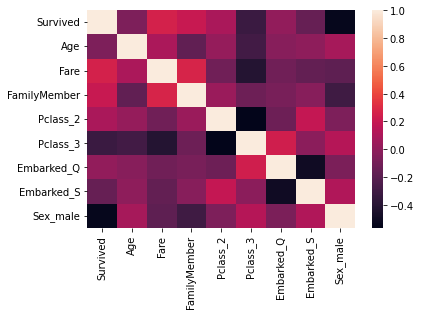

In [706]:
sns.heatmap(df_train.corr())

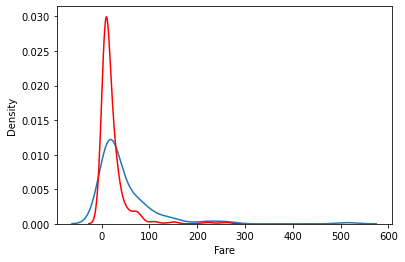

In [707]:
#Fare and survival distribution:
#It is clear that this is a significant predictor
sns.kdeplot(df_train['Fare'][df_train['Survived']==1])
sns.kdeplot(df_train['Fare'][df_train['Survived']==0],color='red')
plt.show()

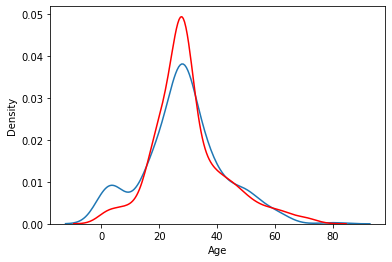

In [708]:
# Age is not that significant
sns.kdeplot(df_train['Age'][df_train['Survived']==1])
sns.kdeplot(df_train['Age'][df_train['Survived']==0],color='red')
plt.show()

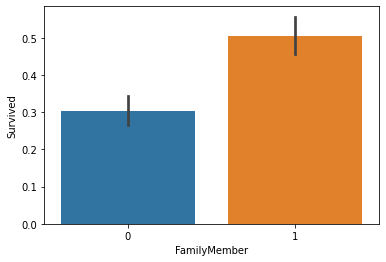

In [709]:
sns.barplot(x='FamilyMember', y='Survived', data=df_train)
plt.show()

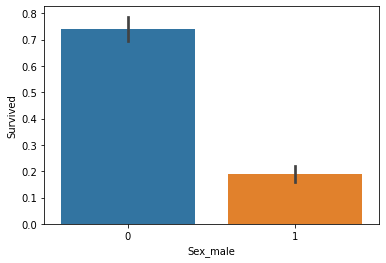

In [710]:
sns.barplot(x='Sex_male', y='Survived', data=df_train)
plt.show()

**Feature Selection and Logistic Regression**

In [711]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [712]:
y = df_train.pop('Survived')

In [713]:
scaler = MinMaxScaler()
x = scaler.fit_transform(df_train)
x_test_scaled = scaler.fit_transform(df_test)

In [714]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [715]:
lr = LogisticRegression(random_state=66)

In [716]:
frwd_selection = SequentialFeatureSelector(lr,n_features_to_select='auto',cv=10).fit(x_train, y_train)

In [717]:
df_train.columns[frwd_selection.get_support()]

Index(['Age', 'Fare', 'FamilyMember', 'Sex_male'], dtype='object')

In [718]:
pca = PCA(n_components = 0.95)
pca.fit(x_train)


PCA(n_components=0.95)

In [719]:
pca.n_components_

6

In [720]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

x_train_frwd = frwd_selection.transform(x_train)
x_test_frwd = frwd_selection.transform(x_test)

In [721]:
lr.fit(x_train_frwd,y_train)
predict_frwd = lr.predict(x_test_frwd) 

In [722]:
lr_pca = LogisticRegression(random_state=34).fit(x_train_pca,y_train)
predict_pca = lr_pca.predict(x_test_pca)

In [723]:
np.sum(predict_frwd - y_test)

-1

In [724]:
np.sum(predict_pca - y_test)

1

In [ ]:
final_predicts = lr_pca.predict(x_te)